# Classless automated data cleaning for chest Xrays with cleanX: example code without using classes
Work by Candace Makeda Moore, MD, Oleg Sivokon, Andrew Murphy 
Please note this workflow does not cover the whole scope of cleanX, and is only meant to show some of the functionality that can be accomplished without using the classes in cleanX. It is essentially a workflow that data analysts and others who do not program at a professional level can follow. A Jupyter based widget and workflow generated by CleanX classes are in other files.  It includes a workflow after JPEGS have been extracted and csvs were made from dataset information. Functions to extract JPEGs using simpleitk or pydicom are in the code of cleanX in the cleanX.dicom_processing module. This module also contains classes which can aid in creating csv files from sets of dicoms, but is not covered in this particular workflow demo.  

## Where the dataset this runs on came from:

To demo this potential workflow we used the CoronaHack -Chest X-Ray-Dataset from Kaggle. The dataset was assembled by Praveen Govindaraj. 


## Libraries and environments

Import libraries:

In [1]:
# get the very latest cleanX off the github!
## DANGER (and this would actually need to get the develop branch instead...)
#!pip uninstall -y cleanX
#!pip install git+https://github.com/drcandacemakedamoore/cleanX.git


In [2]:
# # here is a block in case you have a different branch version downloaded
import sys
sys.path = ['D:/projects/cleanX'] + sys.path

In [3]:
# libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os 

import shutil

from cleanX import dataset_processing as cxcsv
#from cleanX import dicom_processing as cxdcm
from cleanX import image_work as cximg

In [4]:
# library for formatting issues
from IPython.core.interactiveshell import InteractiveShell
from IPython.utils import io

Expose original author environment:

Expose original author environment:
This cell is a locked cell with my environment when this notebook was created:
System Platform: Windows 10
Packages:
absl-py @ file:///D:/bld/absl-py_1606235631785/work
aiohttp @ file:///D:/bld/aiohttp_1610358782056/work
argon2-cffi @ file:///D:/bld/argon2-cffi_1605217174718/work
astor @ file:///home/conda/feedstock_root/build_artifacts/astor_1593610464257/work
astunparse @ file:///home/conda/feedstock_root/build_artifacts/astunparse_1610696312422/work
async-generator==1.10
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1605083924122/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache==1.6.1
beautifulsoup4 @ file:///home/linux1/recipes/ci/beautifulsoup4_1610988766420/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1611678357911/work
blinker==1.4
Bottleneck @ file:///D:/bld/bottleneck_1611195784589/work
cachetools @ file:///home/conda/feedstock_root/build_artifacts/cachetools_1611555765219/work
certifi==2020.12.5
cffi @ file:///D:/bld/cffi_1606601427219/work
chardet @ file:///D:/bld/chardet_1602255574834/work
cleanx==0.1.3
click==7.1.2
cmarkgfm==0.4.2
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1602866480661/work
conda==4.10.1
conda-build==3.21.4
conda-package-handling @ file:///C:/ci/conda-package-handling_1603018162806/work
covid-model-seiir-pipeline==0.1.0
covid-shared==1.0.47
cryptography @ file:///D:/bld/cryptography_1610338853236/work
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
dill @ file:///tmp/build/80754af9/dill_1605066453875/work
docutils==0.16
entrypoints @ file:///home/conda/feedstock_root/build_artifacts/entrypoints_1605121927639/work/dist/entrypoints-0.3-py2.py3-none-any.whl
filelock @ file:///home/linux1/recipes/ci/filelock_1610993975404/work
future==0.18.2
gast==0.3.3
glob2 @ file:///home/linux1/recipes/ci/glob2_1610991677669/work
google-auth @ file:///home/conda/feedstock_root/build_artifacts/google-auth_1608136875028/work
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
googleapis-common-protos @ file:///C:/ci/googleapis-common-protos-feedstock_1600455733359/work
grpcio @ file:///D:/bld/grpcio_1610588756173/work
h5py @ file:///D:/bld/h5py_1602551956383/work
idna @ file:///home/conda/feedstock_root/build_artifacts/idna_1593328102638/work
importlib-metadata==3.10.1
iniconfig==1.1.1
ipykernel @ file:///C:/ci/ipykernel_1596208728219/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython==7.0.1
ipython-genutils==0.2.0
ipywidgets @ file:///tmp/build/80754af9/ipywidgets_1610481889018/work
jedi==0.17.0
Jinja2==2.11.2
joblib @ file:///tmp/build/80754af9/joblib_1607970656719/work
jsonschema @ file:///home/conda/feedstock_root/build_artifacts/jsonschema_1602551949684/work
jupyter==1.0.0
jupyter-client @ file:///home/conda/feedstock_root/build_artifacts/jupyter_client_1610375432619/work
jupyter-console @ file:///tmp/build/80754af9/jupyter_console_1598884538475/work
jupyter-core @ file:///D:/bld/jupyter_core_1611181888391/work
jupyterlab-pygments @ file:///home/conda/feedstock_root/build_artifacts/jupyterlab_pygments_1601375948261/work
jupyterlab-widgets @ file:///home/conda/feedstock_root/build_artifacts/jupyterlab_widgets_1609173350931/work
jupyterthemes==0.20.0
kaggle @ file:///D:/bld/kaggle_1606754824909/work
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing @ file:///home/conda/feedstock_root/build_artifacts/keras-preprocessing_1610713559828/work
keyring==23.0.1
kiwisolver @ file:///D:/bld/kiwisolver_1610099949969/work
lesscpy==0.14.0
libarchive-c @ file:///tmp/build/80754af9/python-libarchive-c_1617780486945/work
loguru==0.5.3
makedalytics==0.0.7
Markdown @ file:///home/conda/feedstock_root/build_artifacts/markdown_1603668500820/work
MarkupSafe @ file:///D:/bld/markupsafe_1610127696479/work
matplotlib @ file:///D:/bld/matplotlib-suite_1605180495775/work
menuinst==1.4.16
mistune @ file:///D:/bld/mistune_1610113018274/work
mkl-fft==1.2.0
mkl-random==1.2.0
mkl-service==2.3.0
multidict @ file:///D:/bld/multidict_1610319180953/work
navigator-updater==0.2.1
nbclient @ file:///home/conda/feedstock_root/build_artifacts/nbclient_1602859080374/work
nbconvert @ file:///D:/bld/nbconvert_1605401997174/work
nbformat @ file:///home/conda/feedstock_root/build_artifacts/nbformat_1611005694671/work
nest-asyncio @ file:///home/conda/feedstock_root/build_artifacts/nest-asyncio_1605195931949/work
notebook @ file:///C:/ci/notebook_1611348264852/work
numexpr @ file:///D:/bld/numexpr_1609341488919/work
numpy @ file:///D:/bld/numpy_1610324712085/work
oauthlib==3.0.1
odeopt==0.1.2
olefile @ file:///home/conda/feedstock_root/build_artifacts/olefile_1602866521163/work
opencv-python==4.5.1.48
opt-einsum==0+untagged.61.gd905544.dirty
packaging @ file:///home/conda/feedstock_root/build_artifacts/packaging_1607785313469/work
pandas==1.1.3
pandocfilters==1.4.2
parse==1.18.0
parso @ file:///home/conda/feedstock_root/build_artifacts/parso_1607618318316/work
patsy==0.5.1
pickleshare @ file:///home/conda/feedstock_root/build_artifacts/pickleshare_1602536217715/work
Pillow @ file:///D:/bld/pillow_1610407628862/work
pip==21.0
pkginfo==1.7.0
plotly @ file:///home/conda/feedstock_root/build_artifacts/plotly_1610471242275/work
pluggy==0.13.1
prometheus-client @ file:///home/conda/feedstock_root/build_artifacts/prometheus_client_1605543085815/work
promise @ file:///C:/ci/promise_1598031850537/work
prompt-toolkit @ file:///home/ktietz/src/ci/prompt-toolkit_1611930248499/work
protobuf==3.14.0
psutil @ file:///C:/ci/psutil_1598352273540/work
psycopg2==2.8.6
py==1.10.0
pyasn1==0.4.8
pyasn1-modules==0.2.7
pycodestyle==2.7.0
pycosat==0.6.3
pycparser @ file:///home/conda/feedstock_root/build_artifacts/pycparser_1593275161868/work
Pygments @ file:///home/conda/feedstock_root/build_artifacts/pygments_1610742651773/work
PyJWT @ file:///home/conda/feedstock_root/build_artifacts/pyjwt_1610910308735/work
pyOpenSSL @ file:///home/conda/feedstock_root/build_artifacts/pyopenssl_1608055815057/work
pyparsing==2.4.7
PyQt5==5.12.3
PyQt5-sip==4.19.18
PyQtChart==5.12
PyQtWebEngine==5.12.1
pyreadline @ file:///D:/bld/pyreadline_1611175297308/work
pyrsistent @ file:///D:/bld/pyrsistent_1610146997928/work
PySocks @ file:///D:/bld/pysocks_1610291658292/work
pytesseract @ file:///home/conda/feedstock_root/build_artifacts/pytesseract_1605866581960/work
pytest==6.2.3
python-dateutil==2.8.1
python-slugify @ file:///tmp/build/80754af9/python-slugify_1600462544980/work
pytz @ file:///home/conda/feedstock_root/build_artifacts/pytz_1608904108784/work
pywin32==300
pywin32-ctypes==0.2.0
pywinpty @ file:///D:/bld/pywinpty_1602377770565/work
PyYAML==5.4.1
pyzmq==20.0.0
qtconsole @ file:///tmp/build/80754af9/qtconsole_1600870028330/work
QtPy==1.9.0
readme-renderer==24.0
requests @ file:///home/conda/feedstock_root/build_artifacts/requests_1608156231189/work
requests-oauthlib @ file:///home/conda/feedstock_root/build_artifacts/requests-oauthlib_1595492159598/work
requests-toolbelt==0.9.1
retrying==1.3.3
rfc3986 @ file:///tmp/build/80754af9/rfc3986_1594058972433/work
rsa @ file:///home/conda/feedstock_root/build_artifacts/rsa_1610280765105/work
ruamel-yaml==0.15.87
scikit-learn @ file:///C:/ci/scikit-learn_1598376983131/work
scipy @ file:///C:/bld/scipy_1609458088359/work
seaborn @ file:///home/conda/feedstock_root/build_artifacts/seaborn-base_1608544589436/work
Send2Trash==1.5.0
setuptools==49.6.0.post20210108
simplegeneric==0.8.1
six @ file:///home/conda/feedstock_root/build_artifacts/six_1590081179328/work
slime==0.0.0
soupsieve @ file:///tmp/build/80754af9/soupsieve_1616183228191/work
statsmodels @ file:///D:/bld/statsmodels_1610414777694/work
tensorboard @ file:///home/builder/ktietz/conda/conda-bld/tensorboard_1604313476433/work/tmp_pip_dir
tensorboard-plugin-wit @ file:///home/conda/feedstock_root/build_artifacts/tensorboard-plugin-wit_1611075653546/work/tensorboard_plugin_wit-1.8.0-py3-none-any.whl
tensorflow==2.3.0
tensorflow-datasets==1.2.0
tensorflow-estimator @ file:///tmp/build/80754af9/tensorflow-estimator_1599136169057/work/whl_temp/tensorflow_estimator-2.3.0-py2.py3-none-any.whl
tensorflow-metadata==0.14.0
termcolor==1.1.0
terminado @ file:///D:/bld/terminado_1609794338660/work
tesserocr @ file:///D:/bld/tesserocr_1610555349210/work
testpath==0.4.4
text-unidecode==1.3
threadpoolctl @ file:///tmp/tmp9twdgx9k/threadpoolctl-2.1.0-py3-none-any.whl
toml==0.10.2
tornado @ file:///D:/bld/tornado_1610094878337/work
tqdm @ file:///tmp/build/80754af9/tqdm_1611857934208/work
traitlets @ file:///home/conda/feedstock_root/build_artifacts/traitlets_1602771532708/work
twine==3.4.1
typing-extensions @ file:///home/conda/feedstock_root/build_artifacts/typing_extensions_1602702424206/work
Unidecode @ file:///tmp/build/80754af9/unidecode_1608579687475/work
urllib3 @ file:///home/conda/feedstock_root/build_artifacts/urllib3_1602615690769/work
vega==3.4.0
wcwidth @ file:///home/conda/feedstock_root/build_artifacts/wcwidth_1600965781394/work
webencodings==0.5.1
Werkzeug==0.16.1
wheel==0.36.2
widgetsnbextension==3.5.1
win-inet-pton @ file:///D:/bld/win_inet_pton_1610147627696/work
win32-setctime==1.0.3
wincertstore==0.2
wrapt @ file:///D:/bld/wrapt_1610095039534/work
xlrd @ file:///tmp/build/80754af9/xlrd_1608072521494/work
xspline==0.0.6
yarl @ file:///D:/bld/yarl_1610354420082/work
zipp @ file:///home/conda/feedstock_root/build_artifacts/zipp_1603668650351/work

In [5]:
# ##To expose user environment, use watermark or get makedalytics, uncomment and run:
#import makedalytics as ma
#ma.packages_to()

## Importing data for example

Data must either be retrieved from existing read X-rays (errors included), or created by humans (already over-burdened with reading X-rays, actually that was the original problem in the first place, right?). Several groups have created big datasets that algorithms can be trained on, but no dataset is perfect for every task. Unfortunately many datasets contain images that may not be appropriate to make a machine learning algorithm from. As a case in point, let's take a look at some of the data in a large set of COVID-19 images. We will use the CoronaHack -Chest X-Ray-Dataset from Kaggle (https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset). The dataset was assembled by Praveen Govindaraj. This dataset has thousands of images ( 5,309 images to be exact)...too many to look through by hand without wasting a lot of time

Unfortunately, keeping 40 gigabytes of image data on Github is not possible or a good idea. If you want to get these images onto your computer, you basically need tosign into Kaggle, and download. There is no way to download without credentials at present.You can however download if you have the API client, and an example cell has been added for this:


In [6]:
# If you have the kaggle API client you can run a download
# to get the API from connda: conda install -c conda-forge kaggle
!kaggle datasets download praveengovi/coronahack-chest-xraydataset --unzip
origin_folder = 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'


  0%|          | 0.00/1.19G [00:00<?, ?B/s]
  0%|          | 2.00M/1.19G [00:00<01:22, 15.4MB/s]
  0%|          | 5.00M/1.19G [00:00<01:05, 19.3MB/s]
  1%|          | 8.00M/1.19G [00:00<00:53, 23.6MB/s]
  1%|          | 12.0M/1.19G [00:00<00:45, 27.5MB/s]
  1%|1         | 16.0M/1.19G [00:00<00:41, 30.5MB/s]
  2%|1         | 20.0M/1.19G [00:00<00:38, 32.8MB/s]
  2%|1         | 24.0M/1.19G [00:00<00:36, 34.3MB/s]
  2%|2         | 28.0M/1.19G [00:00<00:35, 35.3MB/s]
  3%|2         | 32.0M/1.19G [00:01<00:36, 34.2MB/s]
  3%|2         | 36.0M/1.19G [00:01<00:35, 35.3MB/s]
  3%|3         | 40.0M/1.19G [00:01<00:34, 35.8MB/s]
  4%|3         | 44.0M/1.19G [00:01<00:34, 35.9MB/s]
  4%|3         | 48.0M/1.19G [00:01<00:34, 35.9MB/s]
  4%|4         | 52.0M/1.19G [00:01<00:32, 37.0MB/s]
  5%|4         | 56.0M/1.19G [00:01<00:32, 37.0MB/s]
  5%|4         | 60.0M/1.19G [00:01<00:32, 37.5MB/s]
  5%|5         | 64.0M/1.19G [00:01<00:32, 37.5MB/s]
  6%|5         | 68.0M/1.19G [00:02<00:45, 26.6MB/s]
 

 64%|######4   | 781M/1.19G [00:33<00:18, 24.6MB/s]
 65%|######4   | 785M/1.19G [00:33<00:19, 22.6MB/s]
 65%|######4   | 789M/1.19G [00:34<00:17, 25.7MB/s]
 65%|######5   | 793M/1.19G [00:34<00:25, 17.5MB/s]
 66%|######5   | 797M/1.19G [00:34<00:21, 20.6MB/s]
 66%|######5   | 801M/1.19G [00:34<00:22, 19.5MB/s]
 66%|######6   | 805M/1.19G [00:34<00:19, 22.5MB/s]
 66%|######6   | 809M/1.19G [00:35<00:32, 13.3MB/s]
 67%|######6   | 812M/1.19G [00:35<00:27, 15.4MB/s]
 67%|######6   | 815M/1.19G [00:35<00:28, 14.7MB/s]
 67%|######7   | 817M/1.19G [00:36<00:30, 13.7MB/s]
 67%|######7   | 819M/1.19G [00:36<00:46, 8.94MB/s]
 67%|######7   | 821M/1.19G [00:37<00:54, 7.63MB/s]
 68%|######7   | 823M/1.19G [00:37<00:52, 7.82MB/s]
 68%|######7   | 824M/1.19G [00:37<00:56, 7.33MB/s]
 68%|######7   | 826M/1.19G [00:37<00:54, 7.51MB/s]
 68%|######8   | 829M/1.19G [00:37<00:39, 10.3MB/s]
 68%|######8   | 831M/1.19G [00:38<00:40, 10.0MB/s]
 69%|######8   | 834M/1.19G [00:38<00:30, 13.0MB/s]
 69%|######8

Alternatively you can point, click download and put the folder somewhere as illustrated below.

In [7]:
# here I pull the images off my drive,
# you can replicated by putting downloaded data into a folder with the same name
origin_folder ='D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'    

In [8]:
example_train_csv = pd.read_csv('example_csv.csv')
example_train_csv = example_train_csv[example_train_csv.Dataset_type =='TRAIN']
example_train_csv

X_ray_image_name     Label Dataset_type  \
0                             IM-0128-0001.jpeg    Normal        TRAIN   
1                             IM-0127-0001.jpeg    Normal        TRAIN   
2                             IM-0125-0001.jpeg    Normal        TRAIN   
3                             IM-0122-0001.jpeg    Normal        TRAIN   
4                             IM-0119-0001.jpeg    Normal        TRAIN   
...                                         ...       ...          ...   
5281     1-s2.0-S0929664620300449-gr2_lrg-c.jpg  Pnemonia        TRAIN   
5282     1-s2.0-S0929664620300449-gr2_lrg-b.jpg  Pnemonia        TRAIN   
5283     1-s2.0-S0929664620300449-gr2_lrg-a.jpg  Pnemonia        TRAIN   
5284       1-s2.0-S0140673620303706-fx1_lrg.jpg  Pnemonia        TRAIN   
5285  01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  Pnemonia        TRAIN   

     Label_2_Virus_category Label_1_Virus_category  gender  
0                       NaN                    NaN    Male  
1                       NaN                    NaN  Female  
2                       NaN                    NaN  Female  
3                       NaN                    NaN    Male  
4                       NaN                    NaN  Female  
...                     ...                    ...     ...  
5281               COVID-19                  Virus    Male  
5282               COVID-19                  Virus  Female  
5283               COVID-19                  Virus  Female  
5284               COVID-19                  Virus    Male  
5285               COVID-19                  Virus  Female  

[5286 rows x 6 columns]

In [9]:
test_dfE = (os.path.join(origin_folder,'csv_test_example.csv'))
test_df = pd.read_csv(test_dfE)
uniqueIDE = 'X_ray_image_name'
checked_example = cxcsv.check_paths_for_group_leakage(example_train_csv, test_df, uniqueIDE)
checked_example

X_ray_image_name   Label_x Dataset_type_x  \
0                                IM-0128-0001.jpeg    Normal          TRAIN   
1                                IM-0117-0001.jpeg    Normal          TRAIN   
2                                IM-0183-0001.jpeg    Normal          TRAIN   
3                                IM-0176-0001.jpeg    Normal          TRAIN   
4                                IM-0164-0001.jpeg    Normal          TRAIN   
...                                            ...       ...            ...   
1052     7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg  Pnemonia          TRAIN   
1053     4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg  Pnemonia          TRAIN   
1054     2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg  Pnemonia          TRAIN   
1055  1-s2.0-S1684118220300682-main.pdf-002-a2.png  Pnemonia          TRAIN   
1056        1-s2.0-S0929664620300449-gr2_lrg-b.jpg  Pnemonia          TRAIN   

     Label_2_Virus_category_x Label_1_Virus_category_x  gender   Label_y  \
0                         NaN                      NaN    Male    Normal   
1                         NaN                      NaN  Female    Normal   
2                         NaN                      NaN  Female    Normal   
3                         NaN                      NaN    Male    Normal   
4                         NaN                      NaN  Female    Normal   
...                       ...                      ...     ...       ...   
1052                 COVID-19                    Virus    Male  Pnemonia   
1053                 COVID-19                    Virus  Female  Pnemonia   
1054                 COVID-19                    Virus  Female  Pnemonia   
1055                 COVID-19                    Virus    Male  Pnemonia   
1056                 COVID-19                    Virus  Female  Pnemonia   

     Dataset_type_y Label_2_Virus_category_y Label_1_Virus_category_y  
0             TRAIN                      NaN                      NaN  
1             TRAIN                      NaN                      NaN  
2             TRAIN                      NaN                      NaN  
3             TRAIN                      NaN                      NaN  
4             TRAIN                      NaN                      NaN  
...             ...                      ...                      ...  
1052          TRAIN                 COVID-19                    Virus  
1053          TRAIN                 COVID-19                    Virus  
1054          TRAIN                 COVID-19                    Virus  
1055          TRAIN                 COVID-19                    Virus  
1056          TRAIN                 COVID-19                    Virus  

[1057 rows x 10 columns]

## Checking data demographics

In [10]:
# OK, we found our common rows, now we might want to need to clean them away.
# should this be an automated step? Maybe in some newer version
# let's move on to check about bias
bias_checker = cxcsv.see_part_potential_bias(example_train_csv,"Label", ["gender"])
bias_checker   

sums
Label    gender      
Normal   Female   895
         Male     447
Pnemonia Female  2630
         Male    1314

In [11]:
# Uh, oh, we may want to augment away from this bias, potentially by creating new augmented data that is male because we are unbalanced
# But we could also just get more male X-rays...let's say we have a bunch of normal male X-rays
#in a folder we can use dataframe_up_my_pics function to get started with that

Note in the below cell we draw from our own hard drive. See explanation above in earlier markdown cells on how to get the base data. This set of images was made by hand as an example.

In [12]:

image_directory = 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/men'
df_unbias = cximg.dataframe_up_my_pics(image_directory, 'Normal')
df_unbias
# it's a start if we add these onto our training set

identifier_pic_name diagnosis
0                0001-0001.jpeg    Normal
1                0003-0001.jpeg    Normal
2                0007-0001.jpeg    Normal
3                0011-0001.jpeg    Normal
4                 0hfghfgh.jpeg    Normal
..                          ...       ...
609  person97_bacteria_468.jpeg    Normal
610  person99_bacteria_473.jpeg    Normal
611  person99_bacteria_474.jpeg    Normal
612             wertre (2).jpeg    Normal
613                 wertre.jpeg    Normal

[614 rows x 2 columns]

## Examining images
Note: there are many algorithms we can use to examine images for outliers inside of cleanX. Intertingly, in trying different functions, the blind_quality_matrix function (not shown in this workbook) was one often accurate way to pick out images that simply did not belong in sets. We will stick to only showing a few basic "moves" here. 

In [13]:
# let's find absolute outlier images and consider moving them out of the train set
# in the case they are not actually anything close to what we want

In [14]:
# let's see if any images look duplicated, this may take a long time (coffee *10, lunch)
#%%time
found = cximg.cv2_phash_for_dupes(origin_folder)
len(found)     

83

In [15]:
# ok there were a few possible duplicates, let's examine some of them
found.head(25)

hash
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...  11220975181738407421
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...  13363345350591612763
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...    738242121652978579
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...    738242121652978579
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...    738242121652978579
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...    738242121652978579
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...    738242121652978579
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   1826397214287691513
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   1917592227648075799
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9925637689181142782
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...    738242121652978579
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9925637689181142782
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9925637689181142782
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9925637689181142782
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...  13363345350591612763
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9916494669198310587
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   2555491319308549887
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   2555491319308549887
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   1917592227648075799
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...  11220975181738407421
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   2555491319308549887
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   3169610546269847294
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...  10087750879310773997
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9913640070745603827
D:/my_academia/ncs/Coronahack-Chest-XRay-Datase...   9913640070745603827

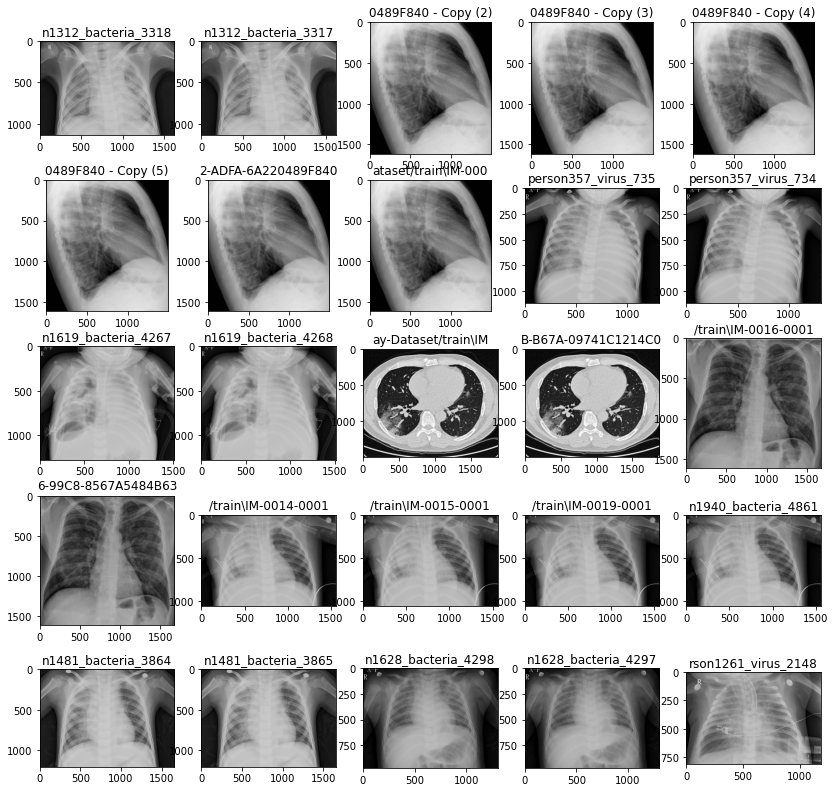

In [16]:
found_sorted = found.sort_values(by = 'hash')
wierd_images_list = found_sorted.index.to_list()

# we need the full file path so here I append the path on each image in the list
final_names = []
for image_string in wierd_images_list[:25]:
    final_names.append(os.path.join(origin_folder, image_string))

cximg.show_images_in_df(final_names,19)


***
 Output:  72  potential duplicate image pairs in  5322  total images.
 At compression level 60 and mse 190


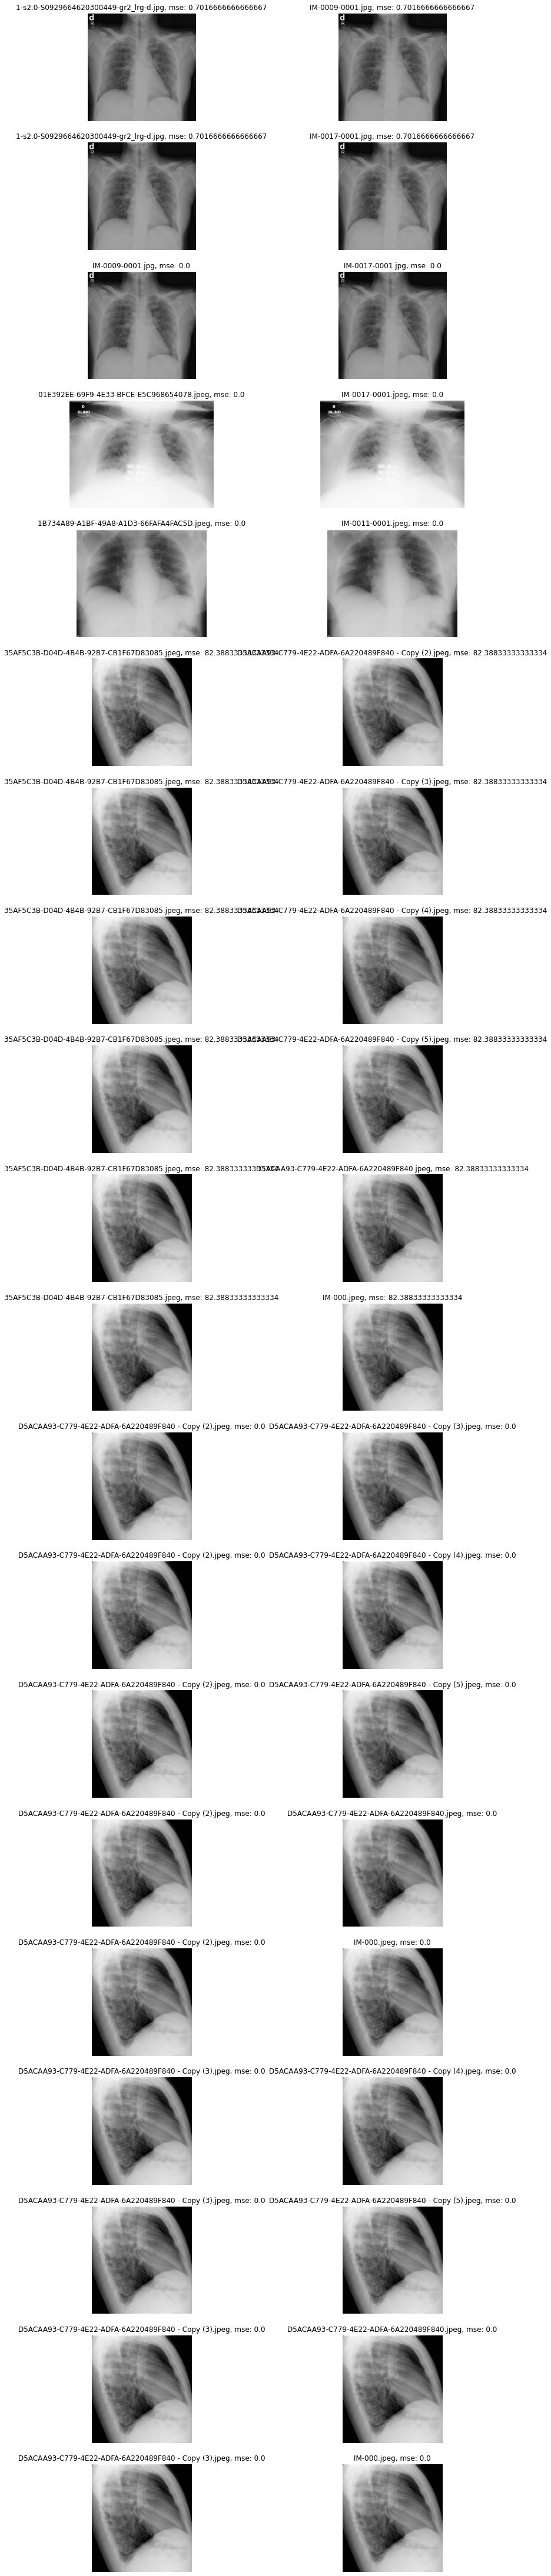

In [17]:
# let's take a closer look at duplicates in a different way
alt_found = cximg.show_close_images(origin_folder,60,190)

In [18]:
# let's look at a sample of upper part of images and see if there are outliers
lovereturned = cximg.find_by_sample_upper(origin_folder, 10, 200)

In [19]:
# show images where the top is 'too white'
wierd_images = lovereturned[lovereturned['where'] != 'less']


In [20]:
wierd_images_list = wierd_images.images.to_list()

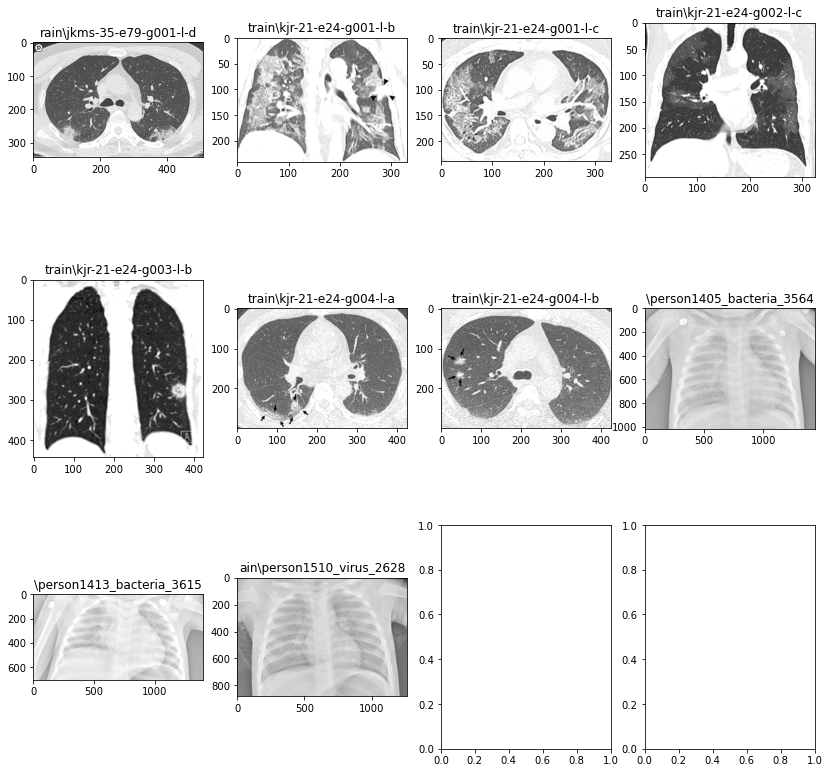

In [21]:
#show me some of those images
cximg.show_images_in_df(wierd_images_list, 25)


In [22]:
# uhoh, that shows that some of our images are not Xrays at all, 
#or have  been cut too low...or have maybe flouroscopy like shading, or , or , or


We can try another way of finding outliers and see what else we turn up.

In [23]:
lovereturned2 = cximg.find_sample_upper_greater_than_lower(origin_folder, 10)

In [24]:
lovereturned2

images       estup  \
0     D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  101.689878   
1     D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...   28.860434   
2     D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...   29.121692   
3     D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...   26.553618   
4     D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...   41.453148   
...                                                 ...         ...   
5317  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  103.619680   
5318  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  120.486729   
5319  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  136.830584   
5320  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  126.421858   
5321  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  150.843291   

         estdown which_greater  
0     125.043801    upper less  
1     120.421829    upper less  
2     145.640267    upper less  
3     159.142134    upper less  
4     130.991801    upper less  
...          ...           ...  
5317  133.834816    upper less  
5318  240.493498    upper less  
5319  244.468895    upper less  
5320  241.807298    upper less  
5321  245.382037    upper less  

[5322 rows x 4 columns]

In [25]:
lovereturned2[lovereturned2.which_greater == 'upper more']

images       estup  \
25    D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  243.877140   
32    D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  225.742588   
82    D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...    7.719889   
110   D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  124.291553   
120   D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  139.604674   
...                                                 ...         ...   
5250  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  144.710177   
5277  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  161.312157   
5302  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  134.631980   
5304  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  168.489240   
5310  D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...  105.963993   

         estdown which_greater  
25    240.960851    upper more  
32    220.110275    upper more  
82      7.090054    upper more  
110   122.358682    upper more  
120   136.260711    upper more  
...          ...           ...  
5250  128.821009    upper more  
5277  158.227829    upper more  
5302  129.493802    upper more  
5304  156.251076    upper more  
5310  101.734218    upper more  

[322 rows x 4 columns]

In [26]:
another_suspect_group = lovereturned2[lovereturned2.which_greater == 'upper more']
another_suspect_group_list = another_suspect_group.images.to_list()
another_suspect_group_list

['D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\kjr-21-e24-g001-l-c.jpg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\kjr-21-e24-g004-l-b.jpg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0133-0001.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0152-0001.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0199-0001.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0217-0001.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0229-0001.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0264-0001

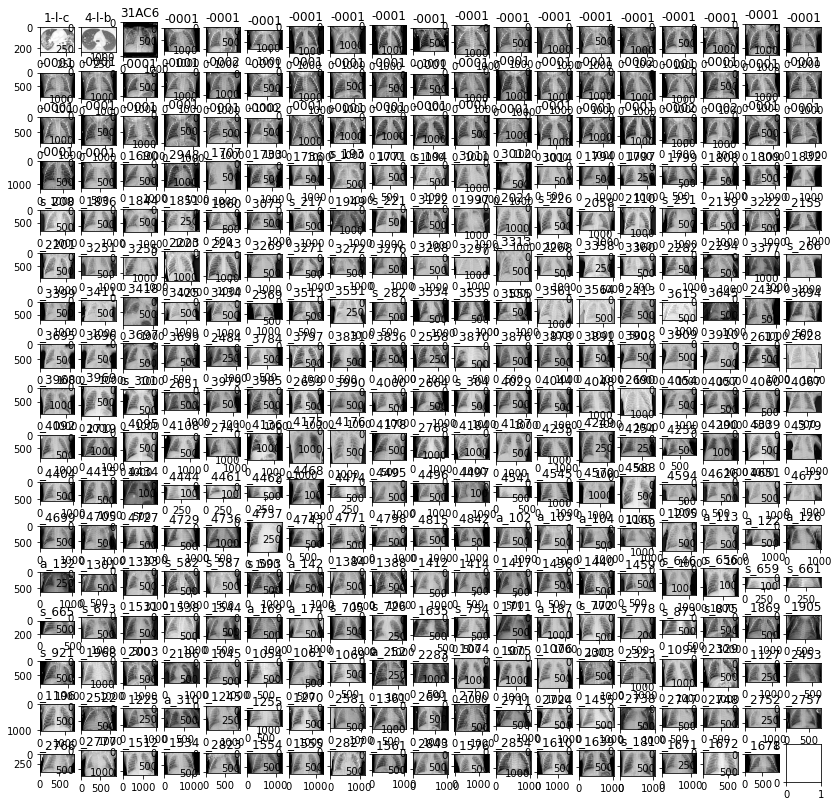

In [27]:
cximg.show_images_in_df(another_suspect_group_list, 5)

Too many to see well, let's look at only some.

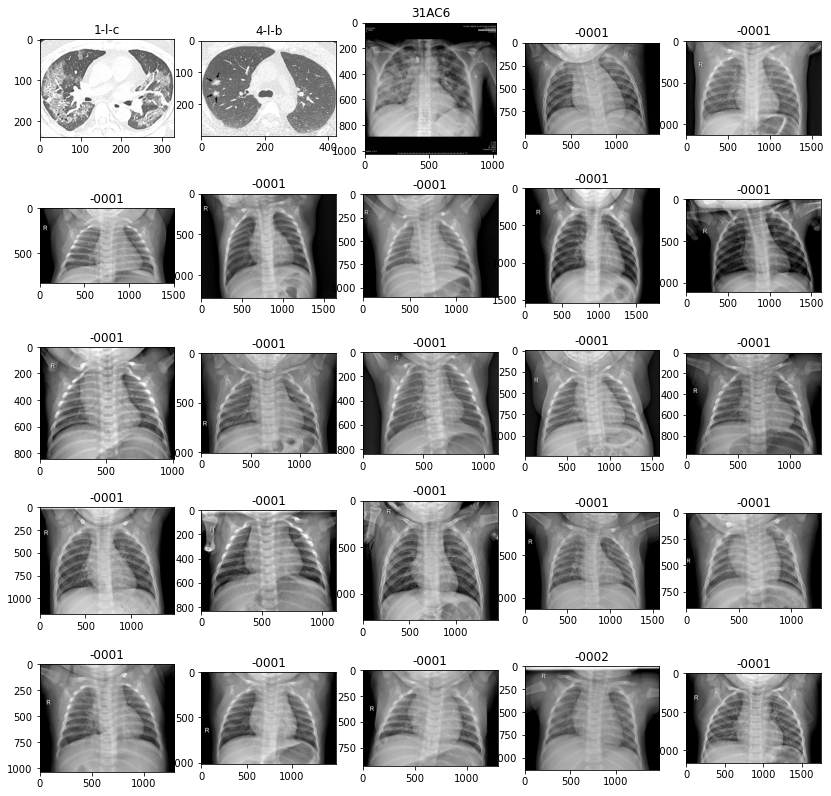

In [28]:
# let's look at a few of them
cximg.show_images_in_df(another_suspect_group_list[:25], 5)
# pull out images I do not want
# this may require a manual check on my lists generated

So we found mostly pediatric images with the patient hands up. Interesting. We probably would not want to make an algorithm for pediatric imaging and adult imaging all at once in the real world for various reasons. Anyways, we can move on to another function.

In [29]:
# OK, let's see where our shape is really off
tiny_image_different = cximg.find_tiny_image_differences(origin_folder, percentile=1)
one_percenters = tiny_image_different[tiny_image_different.results == 'mismatch']
one_percenters.images.to_list() 

['D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1438_bacteria_3718.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1865_bacteria_4737.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\NORMAL2-IM-1275-0001.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1366_bacteria_3490.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person279_bacteria_1316.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1436_bacteria_3711.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1389_bacteria_3531.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1111_bacteria_3052.jpeg',
 'D:/my_academia/ncs/Coronahack-Chest-XRay-Da

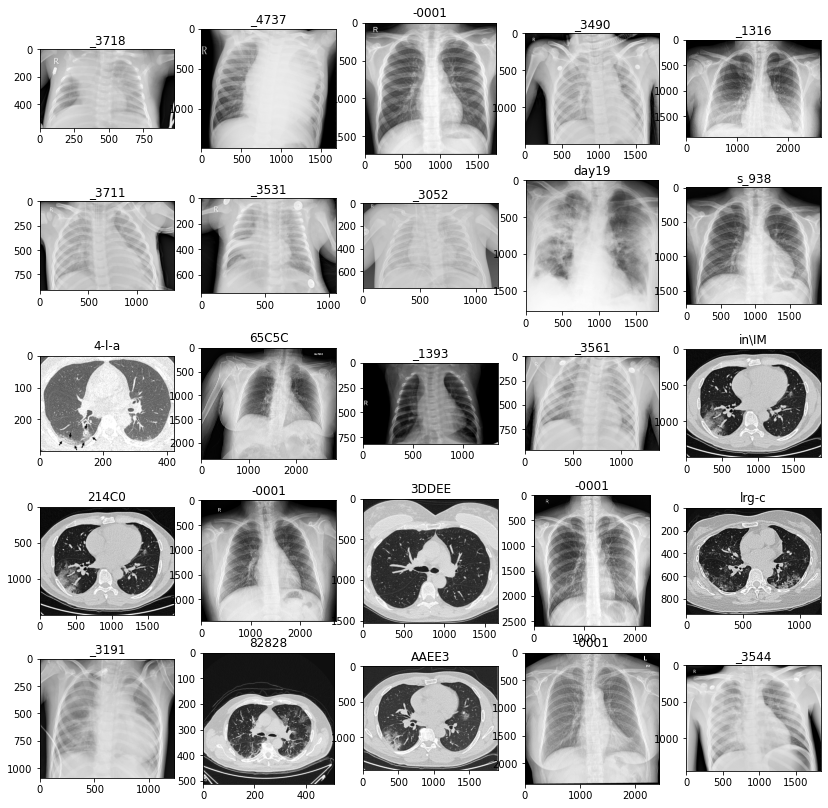

In [30]:
# let's look at some
one_percenters_list= one_percenters.images.to_list()
cximg.show_images_in_df(one_percenters_list[:25], 5)

In [31]:
# we should pick through these by hand, but let's just assume we want to throw them all away
not_one_percenters = tiny_image_different[tiny_image_different.results != 'mismatch']
not_one_percenters_list = not_one_percenters.images.to_list()
one_percenters_list = one_percenters.images.to_list()

In [32]:
# interestingly comparing the two sides was less specific 
#than just getting the ones with high values in the upper part
# so now we can pull thos high values in upper part ones out. 
not_wierd_images = lovereturned[lovereturned['where'] == 'less']
not_wierd_images_list = not_wierd_images.images.to_list()
good_images_list = set(not_wierd_images_list).intersection(not_one_percenters_list)
new_fine_list = []
for element in good_images_list:
    newel = element.replace('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\', '')
    
    new_fine_list.append(newel)

In [33]:
better_trainer = example_train_csv[example_train_csv.X_ray_image_name.isin(new_fine_list)]

# now let's pick those up and throw them into a different folder wis the csv
# can call that folder 'refined'
# note: the data deposited will not be pushed to (rather removed from) my github to save space
refined = "refined"
if os.path.exists(refined):
    print("folder for this seems to exist")
else:    
    try:
        dir = os.path.join(refined)
        if not os.path.exists(dir):
            os.mkdir(dir)
    except OSError:
        print ("Creation of the directory %s failed" % refined)
    else:
        print ("Successfully created the directory %s " % refined)
        
#better_trainer.to_csv(os.path.join(refined,'better_trainer.csv'))        
path0 = os.path.join(refined,'better_trainer.csv')
path1 = path0.replace('\\','/')
path2 = path1.replace('//', '/')
better_trainer.to_csv(path2)

folder for this seems to exist


In [34]:
original_files1 = glob.glob(os.path.join(origin_folder, '*.jpg'))
original_files2 = glob.glob(os.path.join(origin_folder, '*.jpeg'))
original_files = original_files1  + original_files2
target = refined

# for f in original_files:
#     if f.isin() 
    #shutil.copy(f, target)
def copy_to(src):
    shutil.copy(os.path.join(origin_folder,src), target)
better_trainer.X_ray_image_name.apply(copy_to);    

In [35]:
# # ALTERNATIVE CODE BLOCK WITHOUT CLASSES FOR OLDER VERSIONS OF CLEANX:
# # OK, now let's assume we have a good train and test set, and start some exploratory data analysis
# # we want to do it on the real images, not the frames so first we will crop
# # note: the image data deposited will not be pushed to (rather removed from) my github to save space
# target_directory = 'resized_to_same_size2'
# cximg.crop_them_all(refined, target_directory)
# deflep = cximg.dimensions_to_df(target_directory)

Please note the function crop_them_all is depracated. Therefore in an updated notebook (as of January 2022) we would need to sneak in one class function to perform this action.


In [36]:
# here we will run on the images including frames, comment out this block 
#if you wish to copu the code but include a class or use an older version 
# target_directory = refined #?

In [37]:
deflep = cximg.dimensions_to_df(refined)

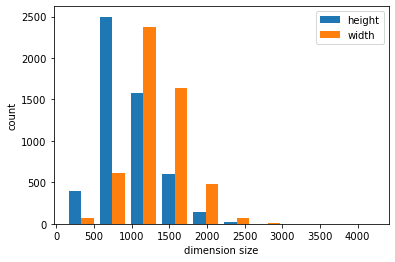

In [38]:
epa_dimensions = cximg.dimensions_to_histo(refined)

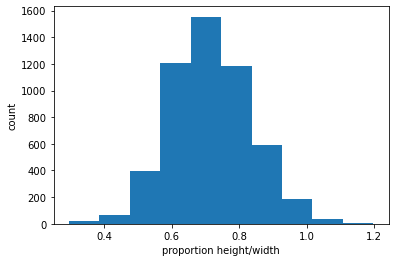

In [39]:
 epa_proportions = cximg.proportions_ht_wt_to_histo(refined, 10)

In [40]:
# well we can see we have a varied bunch of images. Let's make them all the most common size
# print("Most common height", depflex.height.mean())
# print("Most common width", depflex.width.mean())
print("Most common height", deflep.height.mean())
print("Most common width", deflep.width.mean())
print("Most common proportion", deflep.proportion.mean())
if deflep.proportion.mean() == (deflep.height.mean()/deflep.width.mean()):
    print(
        """Most common proportion is actually the most common height over width.\n 
        Parameters for resize are obvious"""
    )
else:
    print("""Most common proportion are not actually the most common height over width.\n 
        Parameters for resize are not obvious"""
    )    
# define ta directory to be created

# note: the data deposited will not be pushed to (rather removed from) my github to save space
pathy = "resized_to_same_size3"
if os.path.exists(pathy):
    print("folder for this seems to exist")
else:    
    try:
        dir = os.path.join(pathy)
        if not os.path.exists(dir):
            os.mkdir(dir)
    except OSError:
        print ("Creation of the directory %s failed" % pathy)
    else:
        print ("Successfully created the directory %s " % pathy)
    

Most common height 968.3376549094376
Most common width 1319.538608198284
Most common proportion 0.7161660410186886
Most common proportion are not actually the most common height over width.
 
        Parameters for resize are not obvious
folder for this seems to exist


In [41]:
original_files1 = glob.glob(os.path.join(origin_folder, '*.jpg'))
original_files2 = glob.glob(os.path.join(origin_folder, '*.jpeg'))
original_files = original_files1  + original_files2
# note: the data deposited will not be pushed to (rather removed from) my github to save space
target = 'resized_to_same_size3'

for f in original_files:
    shutil.copy(f, target)

In [43]:
# warning - this operation may take a relatively long time depending on number
#%%time
#of images - coffee break time!
# note: the data deposited will not be pushed to (rather removed from) my github to save space
# NOTE: here a PIL function snuck in, this could also have been written with cv2
g = 'resized_to_same_size3'
count = 0
dim = (1388, 992)
for file in os.listdir(g):
    f_img = g+"/"+file
    img = cv2.imread(f_img)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(f_img, img)
    count += 1

In [44]:
# find hazy images, see how many and how bad 
found = cximg.find_very_hazy(g)
percent_blurry = ((len(found[found.label_for_haze == 'hazy']))/count)
# If this is less than 2% of images I will just ignore
if percent_blurry*100 > 2:
    print("You have",
          percent_blurry*100,
          "percent images suspect for blurryness. Examine with found[found.label_for_haze == 'hazy']" 
    )
else:
    print ("You have",
        percent_blurry*100,
        "percent images suspect for blurryness. Less than 2% is probably good"
    )

You have 5.3541236145031 percent images suspect for blurryness. Examine with found[found.label_for_haze == 'hazy']


In [45]:
# I just dont' care about blurry images today...but we could have pulled them
# let's make an average image of all (jpeg) trains from our original data
# note: the data deposited will not be pushed to (rather removed from) my github to save space
train_image_directory = 'resized_to_same_size3'
#lotus = cx.avg_image(example_train_csv,'X_ray_image_name', 'Label',g)
lotus = cximg.avg_image_maker((glob.glob(os.path.join(train_image_directory, '*.jpeg'))))


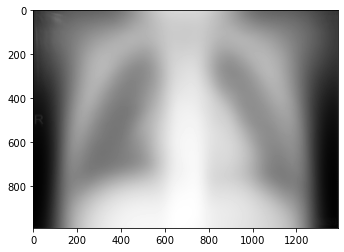

In [46]:
# control matplotlib format issue
InteractiveShell.ast_node_interactivity = "last_expr"
# plot combined image
plt.imshow(lotus, cmap = 'gray');

In [47]:
example_train_csv

X_ray_image_name     Label Dataset_type  \
0                             IM-0128-0001.jpeg    Normal        TRAIN   
1                             IM-0127-0001.jpeg    Normal        TRAIN   
2                             IM-0125-0001.jpeg    Normal        TRAIN   
3                             IM-0122-0001.jpeg    Normal        TRAIN   
4                             IM-0119-0001.jpeg    Normal        TRAIN   
...                                         ...       ...          ...   
5281     1-s2.0-S0929664620300449-gr2_lrg-c.jpg  Pnemonia        TRAIN   
5282     1-s2.0-S0929664620300449-gr2_lrg-b.jpg  Pnemonia        TRAIN   
5283     1-s2.0-S0929664620300449-gr2_lrg-a.jpg  Pnemonia        TRAIN   
5284       1-s2.0-S0140673620303706-fx1_lrg.jpg  Pnemonia        TRAIN   
5285  01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  Pnemonia        TRAIN   

     Label_2_Virus_category Label_1_Virus_category  gender  
0                       NaN                    NaN    Male  
1                       NaN                    NaN  Female  
2                       NaN                    NaN  Female  
3                       NaN                    NaN    Male  
4                       NaN                    NaN  Female  
...                     ...                    ...     ...  
5281               COVID-19                  Virus    Male  
5282               COVID-19                  Virus  Female  
5283               COVID-19                  Virus  Female  
5284               COVID-19                  Virus    Male  
5285               COVID-19                  Virus  Female  

[5286 rows x 6 columns]

In [48]:
# lets make averages of pathological versus non-path, or whatever our labels are
# this is another coffee break
lotus2 = cximg.avg_image_maker_by_label(example_train_csv,'X_ray_image_name', 'Label',origin_folder)
lotus2

name                                             images
0    Normal  [[14306.75, 16104.1875, 16378.875, 16380.125, ...
1  Pnemonia  [[14596.3125, 16363.5, 16367.25, 16464.6875, 1...

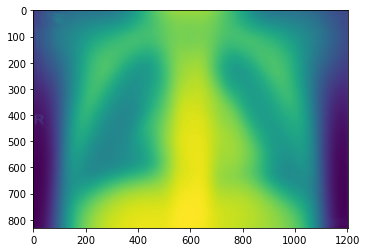

In [49]:
one = lotus2.images[1]
plt.imshow(one);

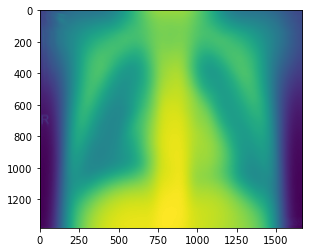

In [50]:
two = lotus2.images[0]
plt.imshow(two);

OK, we can observe that in our original folder, the pathological images tended to 
be X-rayed with different proportions, but shall we compare apples to apples, and see if there is much difference image to image?

In [51]:
#OK, we can observe that in our original folder, the pathological images tended to 
#be X-rayed with
# different proportions, but shall we compare apples to apples, and see if there is much 
#difference image to image?
with io.capture_output() as captured:    
    all_apples = cximg.set_image_variability(glob.glob(os.path.join(train_image_directory, '*.jpeg')))

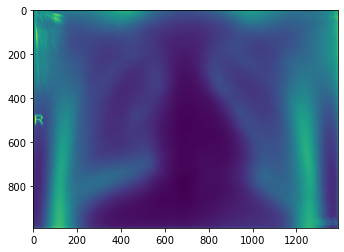

In [52]:
plt.imshow(all_apples);

OK, hardly surprising we vary most  on where the big 'edges' are and in the lungs
I guess they didn't tape the patients to exactly the same position down to the centimeter.
I wonder if we have images with text (may take a long time )

In [53]:
text_question = cximg.tesseract_specific(train_image_directory)
text_question

images           text  \
0     resized_to_same_size3\1-s2.0-S0140673620303706...        \n\n \n   
1     resized_to_same_size3\1-s2.0-S0929664620300449...             \n   
2     resized_to_same_size3\1-s2.0-S0929664620300449...             \n   
3     resized_to_same_size3\1-s2.0-S0929664620300449...   \n\n \n\n \n   
4     resized_to_same_size3\1-s2.0-S0929664620300449...             \n   
...                                                 ...            ...   
5318     resized_to_same_size3\person9_bacteria_41.jpeg             \n   
5319  resized_to_same_size3\SARS-10.1148rg.242035193...             \n   
5320  resized_to_same_size3\SARS-10.1148rg.242035193...             \n   
5321  resized_to_same_size3\SARS-10.1148rg.242035193...             \n   
5322  resized_to_same_size3\SARS-10.1148rg.242035193...             \n   

     clean_text  
0                
1                
2                
3                
4                
...         ...  
5318             
5319             
5320             
5321             
5322             

[5323 rows x 3 columns]

In [54]:
text_question.clean_text.unique()

array(['', 'MOBILE\nSUPINE', 'A Nas\n\n. & )\nA\n\\ ya', '~~ AP MOBIL',
       'AP ERECT MOBILE', 'aa | i. Cae) ee De ee) ee', 'SEDUTO',
       'eal\n\nORTOSTASI',
       'ods) Mate Ne ME Broke meat\nBok)\n\nce BE YEtys\n\n \n\nPagina: 1 di 1',
       'SUPINO', 'A LETTO',
       'RX TORACE\neee tt md\n\nAT AOPs Aerie reeteees\n\nPelee\nNeral\n\nPage: 1 of 1',
       'AP EREC',
       '1\nlea bad\n\n   \n\nORE] fener\n\nCree) Paar\nPed a Reel', 'if',
       'AP Seduto', 'D SUP',
       'ORE Co] 5.\n\nEET\nreject\n3 9 ———————————————', 'vo',
       'eae) Stolen\nTl heen\n\n09/03/2020, 11:09:20\n\nPage: 1 of 1',
       'RX DEL TORACE AL LETTO DEL PAZIENTE\nBae ats\n\ncept Ipt Led\n57 ANNO\n\n400\n\nFaery\n\nloecr ers\nREEL\n\nfo eer leree\nree\n\nPagina: 1 di1',
       'Se RL ae ———————\n\nEs fret)',
       'RX TORACE\nad\n\n29/02/2020, 01:35 :05\n\nooo00\nVGDR7501\ns\n\nate ee oad',
       '2\n¥', 'at,\n-\n\nye\n\n \n\n2 oe a%\n\n"y', 'oe', 'we. E',
       'Hy \\ fe eam ea)', 'ae', '—\nf

There was some text, 
i.e. "'RX DEL TORACE AL LETTO DEL PAZIENTE"
but not text that said pneumonia, or COVID, or another diagnosis we would be concerned with
if our goal was to use the dataset to make an algorithm to find COVID-19 images.
We can also make augmented images.

## Normalizing and Augmenting images

We have several functions for augmenting images. These include but are not limited to:
     subtle_sharpie_enhance
     salting
     simple_rotation_augmentation
     blur_out_edges
These functions are in the image_functions.py file. Feel free to ask for a different one in disucssions (https://github.com/drcandacemakedamoore/cleanX/discussions). 
 

We have histogram based normalization- but it is easier to use with classes. Check out our other workflow "classes_workflow" to see it in action.

## Showing or "watermarking" environment: I include my packages here:

Below are two blocks you may want to run if you have the makedalytics or watermark libraries to expose the environent you are in.

In [55]:
# ##To expose user environment, use watermark or get makedalytics, uncomment and run:
# import makedalytics as ma
# ma.packages_to()

In [56]:
# import watermark
# %load_ext watermark
# %watermark -v -m -p cleanX,SimpleITK,numpy,matplotlib,pandas,cv2,glob,os,shutil,PIL



You can learn more about cleanX's other functions in the other notebooks [here](https://github.com/drcandacemakedamoore/cleanX/blob/main/workflow_demo/bias_not.ipynb) and [here](https://github.com/drcandacemakedamoore/cleanX/blob/main/workflow_demo/classes_workflow.ipynb).